In [58]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/students_simple.csv')
df.head()

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5


In [16]:
N = 7

col_1 = N % 5
col_2 = N ** 2 % 5

col_1_name = df.columns[col_1]
col_2_name = df.columns[col_2]

print(f'Названия колонок:\n{col_1_name}\n{col_2_name}')

Названия колонок:
income
pages


# Расчет корреляций

### Корреляция Фехнера
$$ K = \frac{ \sum_{i=1}^{n} [sign(x_i - \overline{x}) = sign(y_i - \overline{y})] - [sign(x_i - \overline{x}) \ne sign(y_i - \overline{y})] }{n} $$

In [20]:
income_mean = np.mean(df[col_1_name])
pages_mean = np.mean(df[col_2_name])

income_signes = np.sign(df[col_1_name] - income_mean).astype('int')
pages_signes = np.sign(df[col_2_name] - pages_mean).astype('int')

fenher_corr = (np.sum(income_signes == pages_signes) - np.sum(income_signes != pages_signes)) / len(df)
print(f'Корреляция Фенхера: {fenher_corr}')


Корреляция Фенхера: -0.2


Отрицательный знак говорит о том, что наблюдается антикорреляция <br>
Исходя из таблиц значение 0.2 говорит о слабой корреляции <br><br>
Область значений у коэффицента корреляции [-1, 1]

### Корреляция Пирсона 


Расчет ковариации
$$
    cov = \frac{
        \sum_{i=1}^{n}
            (x_i - \overline{x}) (y_i - \overline{y}) 
    }{n-1}
$$
Расчет корреляции
$$
    K = \frac{cov}{S_x S_y}
$$
$$ S_x^2 = \frac{\sum_{i=1}^{n} (x - \overline{x})^2}{n-1} $$
Т-статистика
$$ T = \frac{K \sqrt{n-2}}{\sqrt{1-K^2}} $$

In [49]:
alpha = 0.05

cov = np.sum((df[col_1_name] - income_mean)*(df[col_2_name] - pages_mean)) / (len(df) - 1)
s_1 = np.sqrt(np.sum((df[col_1_name] - income_mean)**2) / (len(df) - 1))
s_2 = np.sqrt(np.sum((df[col_2_name] - pages_mean)**2) / (len(df) - 1))
pirson_corr = cov / (s_1*s_2)

t_stat = pirson_corr * np.sqrt(len(df) - 2) / np.sqrt(1 - pirson_corr**2)
critical_value = stats.t.ppf(1 - alpha/2, (len(df) - 2))

print(f'Корреляция Пирсона: {pirson_corr:.3f}')
print(f'Значение Т-статистики: {t_stat:.3f}')
print(f'Критическое значение: {critical_value}')

# доверительный интревал
z = np.arctanh(pirson_corr)
t_y = stats.norm.ppf(1-alpha)

left = np.tanh(z-t_y/np.sqrt(len(df)-3))
right = np.tanh(z+t_y/np.sqrt(len(df)-3))
print(f'Доверительный интервал: ({left:.3}; {right:.3})')

Корреляция Пирсона: 0.208
Значение Т-статистики: 0.903
Критическое значение: 2.10092204024096
Доверительный интервал: (-0.185; 0.544)


Значение статистики по модулю меньше, чем критическое значение, следовательно $H_0$ гипотезу принимаем

### Корреляция Спирмена

Корреляция Спирмана есть корреляция Пирсона над ранговыми наборами $(R(x_1)_, \dots, R(x_1))$ и $(R(y_1)_, \dots, R(y_1))$

$$
K = \frac{
    \sum_{i=1}^{n} 
    (R(x_i) - \overline{R(x)}) \cdot (R(y_i) - \overline{R(y)}) 
    }
    {
        \left[
        \left( \sum_{i=1}^{n} (R(x_i) - \overline{R(x)})^2 \right)
        \cdot
        \left( \sum_{i=1}^{n} (R(y_i) - \overline{R(y)})^2 \right)
        \right]^{\frac{1}{2}}
    } =
$$
$$
= 1 - \frac{6}{n (n-1) (n+1)} \sum_{i=1}^{n} \left( R(x_i) - R(y_i)\right)^2
$$

In [51]:
rank_1 = stats.rankdata(df[col_1_name])
rank_2 = stats.rankdata(df[col_2_name])

mean_rank_1 = np.mean(rank_1)
mean_rank_2 = np.mean(rank_2)

cov = np.sum((rank_1 - mean_rank_1)*(rank_2 - mean_rank_2)) / (len(df) - 1)
s_1 = np.sqrt(np.sum((rank_1 - mean_rank_1)**2) / (len(df) - 1))
s_2 = np.sqrt(np.sum((rank_2 - mean_rank_2)**2) / (len(df) - 1))
spirmen_corr = cov / (s_1*s_2)

print(f'Корреляция Спирмена: {spirmen_corr:.3f}')

Корреляция Спирмена: 0.241


### Корреляция Кенделла

$$
K = 1 - \frac{4}{n (n-1)} 
\sum_{i=1}^{n-1} \sum_{j=i+1}^{n}
\left[ [x_i < x_j] \ne [y_i < y_j] \right]
$$

In [57]:
c = 0
for i in range(len(df)-1):
    for j in range(i+1, len(df)):
        sign_1 = df[col_1_name][i] < df[col_1_name][j]
        sign_2 = df[col_2_name][i] < df[col_2_name][j]
        if sign_1 != sign_2:
            c += 1
kendel_corr = 1 - 4 / (len(df) * (len(df) - 1)) * c
print(f'Корреляция Кенделла: {kendel_corr:.3f}')

Корреляция Кенделла: 0.200


# Визуализация

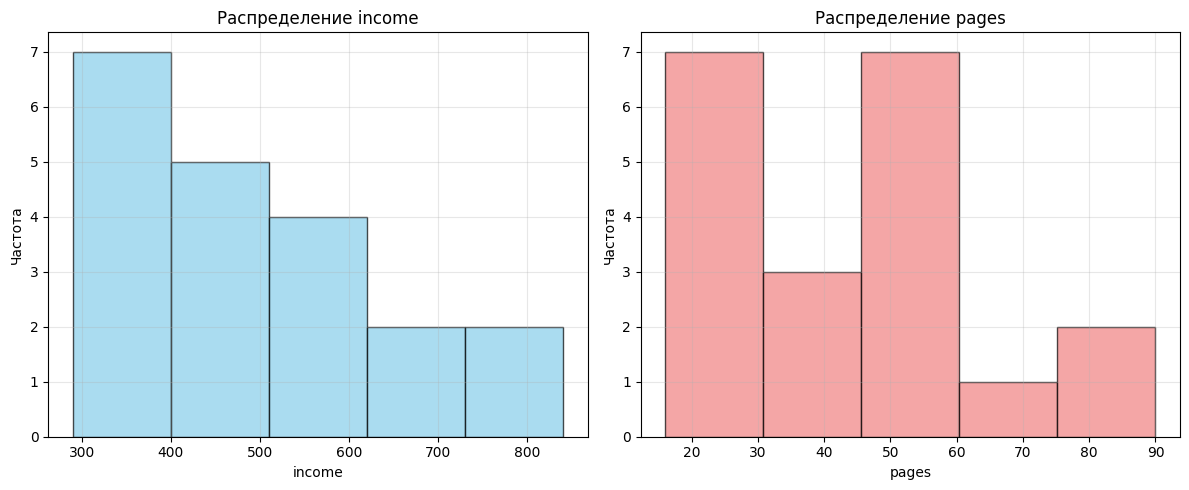

In [67]:
n_bins = int(np.floor(1+np.log2(len(df))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df[col_1_name], bins=n_bins, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title(f'Распределение {col_1_name}')
ax1.set_xlabel(col_1_name)
ax1.set_ylabel('Частота')
ax1.grid(True, alpha=0.3)

ax2.hist(df[col_2_name], bins=n_bins, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title(f'Распределение {col_2_name}')
ax2.set_xlabel(col_2_name)
ax2.set_ylabel('Частота')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Распределения по гистограммам не соотвествуют нормальному и в целом говоря табличным тоже

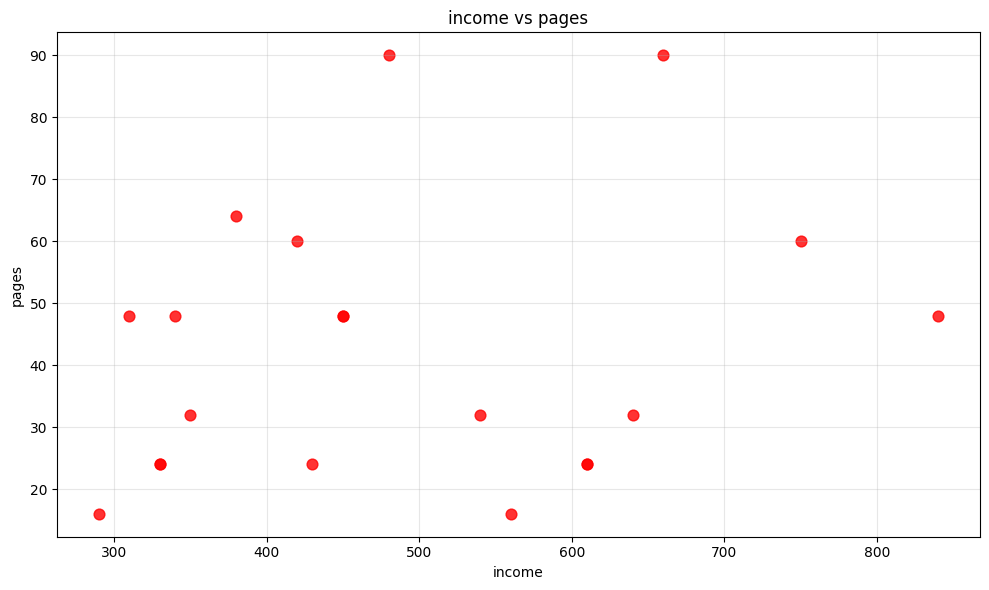

In [80]:
plt.figure(figsize=(10, 6))

plt.scatter(df[col_1_name], df[col_2_name], 
           color='red', alpha=0.8, s=60)

plt.title(f'{col_1_name} vs {col_2_name}')
plt.xlabel(col_1_name)
plt.ylabel(col_2_name)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

По scatter plot видно, что зависимости между величинами нет (что доказало отсуствие корреляции и в последствии докажут попытки построить регрессию)

#  Уравнение регрессии

$$ Q(w) = \sum_{i=1}^{n} (y_i - \hat{y}(x_i, w))^2 \rightarrow \min_{w} $$
 $$ \frac{\partial{Q}}{\partial{w}} = 0 $$

### линейная, $y=w_1 x + w_0$

In [85]:
def analytical_linear_regression(x, y):
    n = len(x)
    X = np.column_stack([np.ones(n), x])
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y
    
    w0, w1 = w
    y_pred = w0 + w1 * x
    
    # R²
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return w0, w1, r2, y_pred

### квадратичная, $y = w_2 x^2 + w_1 x + w_0$

In [86]:
def analytical_quadratic_regression(x, y):
    n = len(x)
    X = np.column_stack([np.ones(n), x, x**2])
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y
    
    w0, w1, w2 = w
    y_pred = w0 + w1 * x + w2 * x**2
    
    # R²
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return w0, w1, w2, r2, y_pred

### гиперболическая, $y = \frac{w_1}{x} + w_0$ 

In [87]:
def analytical_hyperbolic_regression(x, y):
    # Исключаем x = 0
    mask = x != 0
    x_clean = x[mask]
    y_clean = y[mask]
    n = len(x_clean)
    
    # Преобразование: y = w1/x + w0
    X = np.column_stack([np.ones(n), 1/x_clean])
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y_clean
    
    w0, w1 = w
    y_pred = w0 + w1 / x_clean
    
    # R²
    ss_res = np.sum((y_clean - y_pred) ** 2)
    ss_tot = np.sum((y_clean - np.mean(y_clean)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return w0, w1, r2, y_pred, x_clean

### показательная, $y = w_1^x \cdot w_0$

In [88]:
def analytical_exponential_regression(x, y):
    if not np.all(y > 0):
        return None, None, None, None, "y должен быть > 0"
    
    # Линеаризация: ln(y) = ln(w0) + x * ln(w1)
    # y = w0 * w1^x -> ln(y) = ln(w0) + x * ln(w1)
    log_y = np.log(y)
    n = len(x)
    
    X = np.column_stack([np.ones(n), x])
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w_log = XTX_inv @ X.T @ log_y
    
    ln_w0, ln_w1 = w_log
    w0 = np.exp(ln_w0)
    w1 = np.exp(ln_w1)
    
    y_pred = w0 * (w1 ** x)
    
    # R²
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return w0, w1, r2, y_pred, None

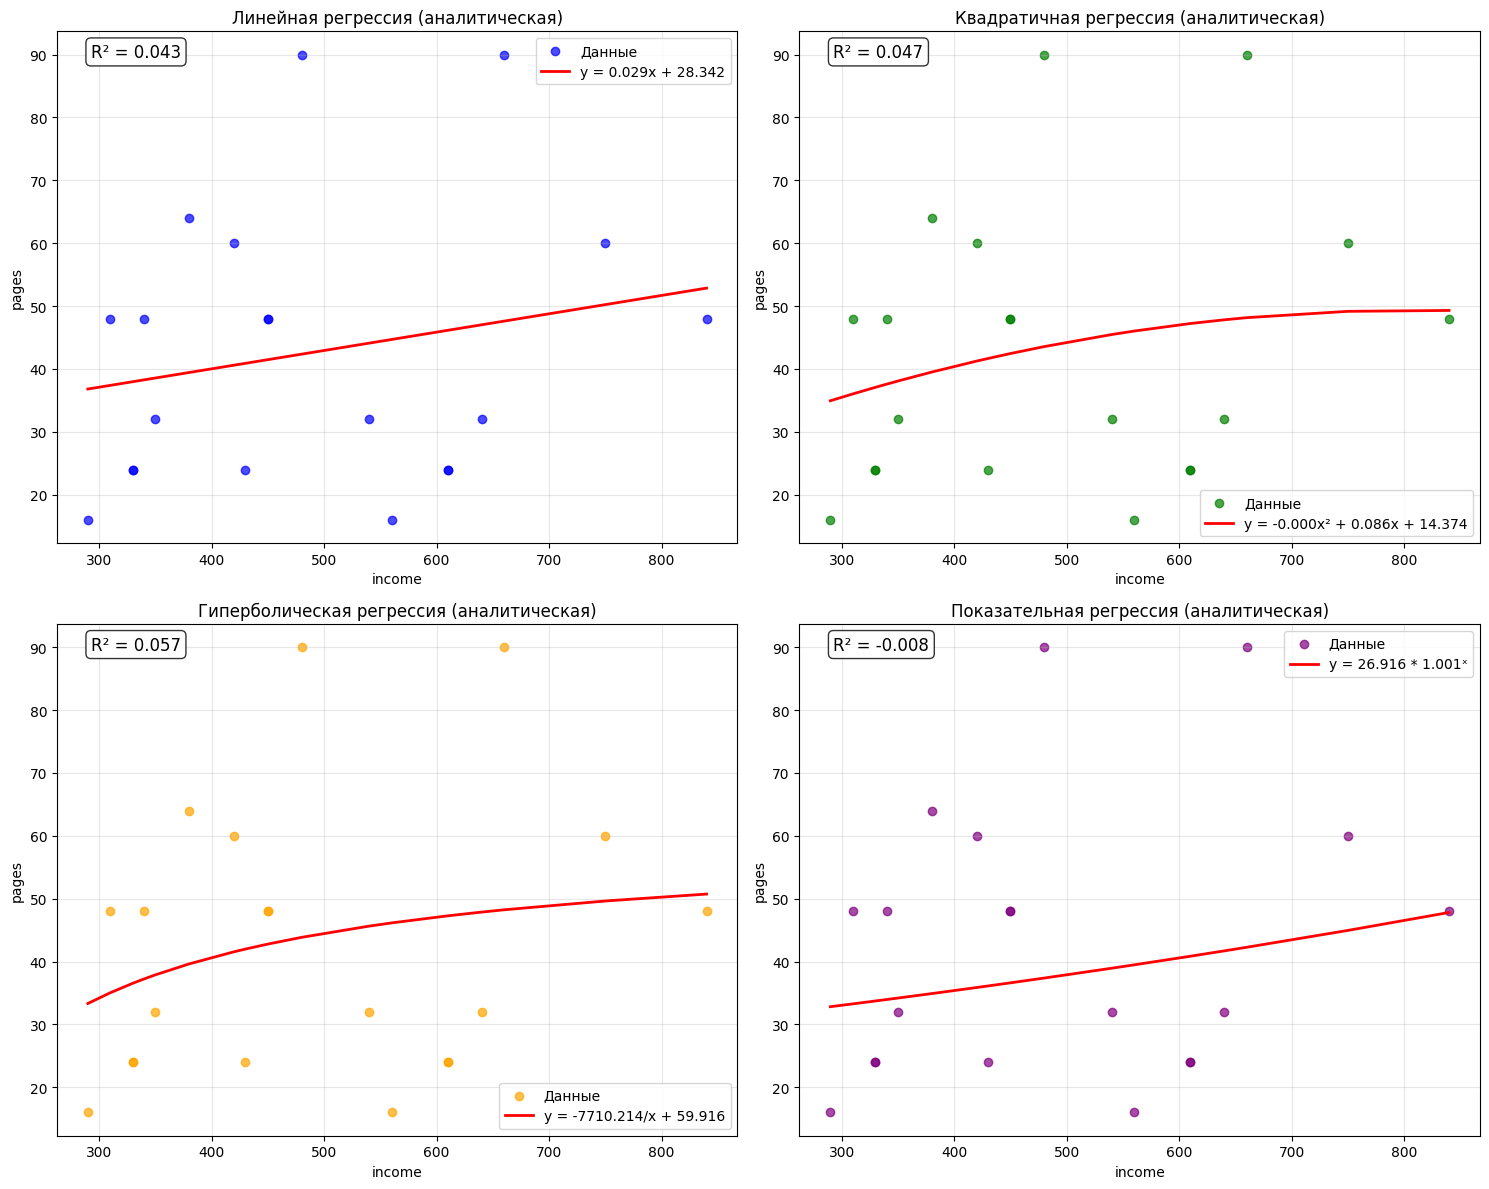

АНАЛИТИЧЕСКИЕ РЕШЕНИЯ:
Линейная:      y = 0.029187 * x + 28.341912 (R² = 0.043339)
Квадратичная:  y = -0.000053 * x² + 0.086384 * x + 14.374048 (R² = 0.046897)
Гиперболическая: y = -7710.213904 / x + 59.915835 (R² = 0.056601)
Показательная:   y = 26.916369 * 1.000684ˣ (R² = -0.008303)


In [89]:
x = df[col_1_name].values
y = df[col_2_name].values

sort_idx = np.argsort(x)
x_sorted = x[sort_idx]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# 1. ЛИНЕЙНАЯ РЕГРЕССИЯ
w0_linear, w1_linear, r2_linear, y_pred_linear = analytical_linear_regression(x, y)
y_linear_sorted = w0_linear + w1_linear * x_sorted

axes[0].scatter(x, y, alpha=0.7, color='blue', label='Данные')
axes[0].plot(x_sorted, y_linear_sorted, 'r-', linewidth=2, 
            label=f'y = {w1_linear:.3f}x + {w0_linear:.3f}')
axes[0].set_title('Линейная регрессия (аналитическая)')
axes[0].set_xlabel(col_1_name)
axes[0].set_ylabel(col_2_name)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r2_linear:.3f}', 
            transform=axes[0].transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 2. КВАДРАТИЧНАЯ РЕГРЕССИЯ
w0_quad, w1_quad, w2_quad, r2_quad, y_pred_quad = analytical_quadratic_regression(x, y)
y_quad_sorted = w0_quad + w1_quad * x_sorted + w2_quad * x_sorted**2

axes[1].scatter(x, y, alpha=0.7, color='green', label='Данные')
axes[1].plot(x_sorted, y_quad_sorted, 'r-', linewidth=2, 
            label=f'y = {w2_quad:.3f}x² + {w1_quad:.3f}x + {w0_quad:.3f}')
axes[1].set_title('Квадратичная регрессия (аналитическая)')
axes[1].set_xlabel(col_1_name)
axes[1].set_ylabel(col_2_name)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].text(0.05, 0.95, f'R² = {r2_quad:.3f}', 
            transform=axes[1].transAxes, fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ
w0_hyper, w1_hyper, r2_hyper, y_pred_hyper, x_hyper = analytical_hyperbolic_regression(x, y)
if x_hyper is not None:
    sort_idx_hyper = np.argsort(x_hyper)
    x_hyper_sorted = x_hyper[sort_idx_hyper]
    y_hyper_sorted = w0_hyper + w1_hyper / x_hyper_sorted
    
    axes[2].scatter(x, y, alpha=0.7, color='orange', label='Данные')
    axes[2].plot(x_hyper_sorted, y_hyper_sorted, 'r-', linewidth=2, 
                label=f'y = {w1_hyper:.3f}/x + {w0_hyper:.3f}')
    axes[2].set_title('Гиперболическая регрессия (аналитическая)')
    axes[2].set_xlabel(col_1_name)
    axes[2].set_ylabel(col_2_name)
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    axes[2].text(0.05, 0.95, f'R² = {r2_hyper:.3f}', 
                transform=axes[2].transAxes, fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
else:
    axes[2].text(0.5, 0.5, 'Невозможно вычислить\n(x содержит нули)', 
                transform=axes[2].transAxes, ha='center')
    axes[2].set_title('Гиперболическая регрессия')

# 4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ
result = analytical_exponential_regression(x, y)
if result[4] is None:
    w0_exp, w1_exp, r2_exp, y_pred_exp, _ = result
    y_exp_sorted = w0_exp * (w1_exp ** x_sorted)
    
    axes[3].scatter(x, y, alpha=0.7, color='purple', label='Данные')
    axes[3].plot(x_sorted, y_exp_sorted, 'r-', linewidth=2, 
                label=f'y = {w0_exp:.3f} * {w1_exp:.3f}ˣ')
    axes[3].set_title('Показательная регрессия (аналитическая)')
    axes[3].set_xlabel(col_1_name)
    axes[3].set_ylabel(col_2_name)
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    axes[3].text(0.05, 0.95, f'R² = {r2_exp:.3f}', 
                transform=axes[3].transAxes, fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
else:
    axes[3].text(0.5, 0.5, result[4], 
                transform=axes[3].transAxes, ha='center')
    axes[3].set_title('Показательная регрессия')

plt.tight_layout()
plt.show()

# Вывод результатов
print("АНАЛИТИЧЕСКИЕ РЕШЕНИЯ:")
print("=" * 60)
print(f"Линейная:      y = {w1_linear:.6f} * x + {w0_linear:.6f} (R² = {r2_linear:.6f})")
print(f"Квадратичная:  y = {w2_quad:.6f} * x² + {w1_quad:.6f} * x + {w0_quad:.6f} (R² = {r2_quad:.6f})")
if x_hyper is not None:
    print(f"Гиперболическая: y = {w1_hyper:.6f} / x + {w0_hyper:.6f} (R² = {r2_hyper:.6f})")
if result[4] is None:
    print(f"Показательная:   y = {w0_exp:.6f} * {w1_exp:.6f}ˣ (R² = {r2_exp:.6f})")

# Проверка уравнения регрессии

### Критерий Фишера

$H_0$: уравнение регрессии не значимо, $w=0$

$$ F = \frac{R^2}{1-R^2} \cdot \frac{n-k}{k-1} $$
где k = 2

ПРОВЕРКА ЗНАЧИМОСТИ УРАВНЕНИЙ РЕГРЕССИИ
H0: уравнение регрессии не значимо (все коэффициенты = 0)
H1: уравнение регрессии значимо (хотя бы один коэффициент ≠ 0)

--- LINEAR РЕГРЕССИЯ ---
R² = 0.043339
F-статистика = 0.815440
Критическое значение F(1,18) = 4.413873
P-value = 0.378443
Статистически значима: НЕТ
✗ НЕ ОТВЕРГАЕМ H0: уравнение регрессии не значимо

--- QUADRATIC РЕГРЕССИЯ ---
R² = 0.046897
F-статистика = 0.418237
Критическое значение F(2,17) = 3.591531
P-value = 0.664797
Статистически значима: НЕТ
✗ НЕ ОТВЕРГАЕМ H0: уравнение регрессии не значимо

--- HYPERBOLIC РЕГРЕССИЯ ---
R² = 0.056601
F-статистика = 1.079941
Критическое значение F(1,18) = 4.413873
P-value = 0.312469
Статистически значима: НЕТ
✗ НЕ ОТВЕРГАЕМ H0: уравнение регрессии не значимо

--- EXPONENTIAL РЕГРЕССИЯ ---
R² = -0.008303
F-статистика = -0.148217
Критическое значение F(1,18) = 4.413873
P-value = 1.000000
Статистически значима: НЕТ
✗ НЕ ОТВЕРГАЕМ H0: уравнение регрессии не значимо


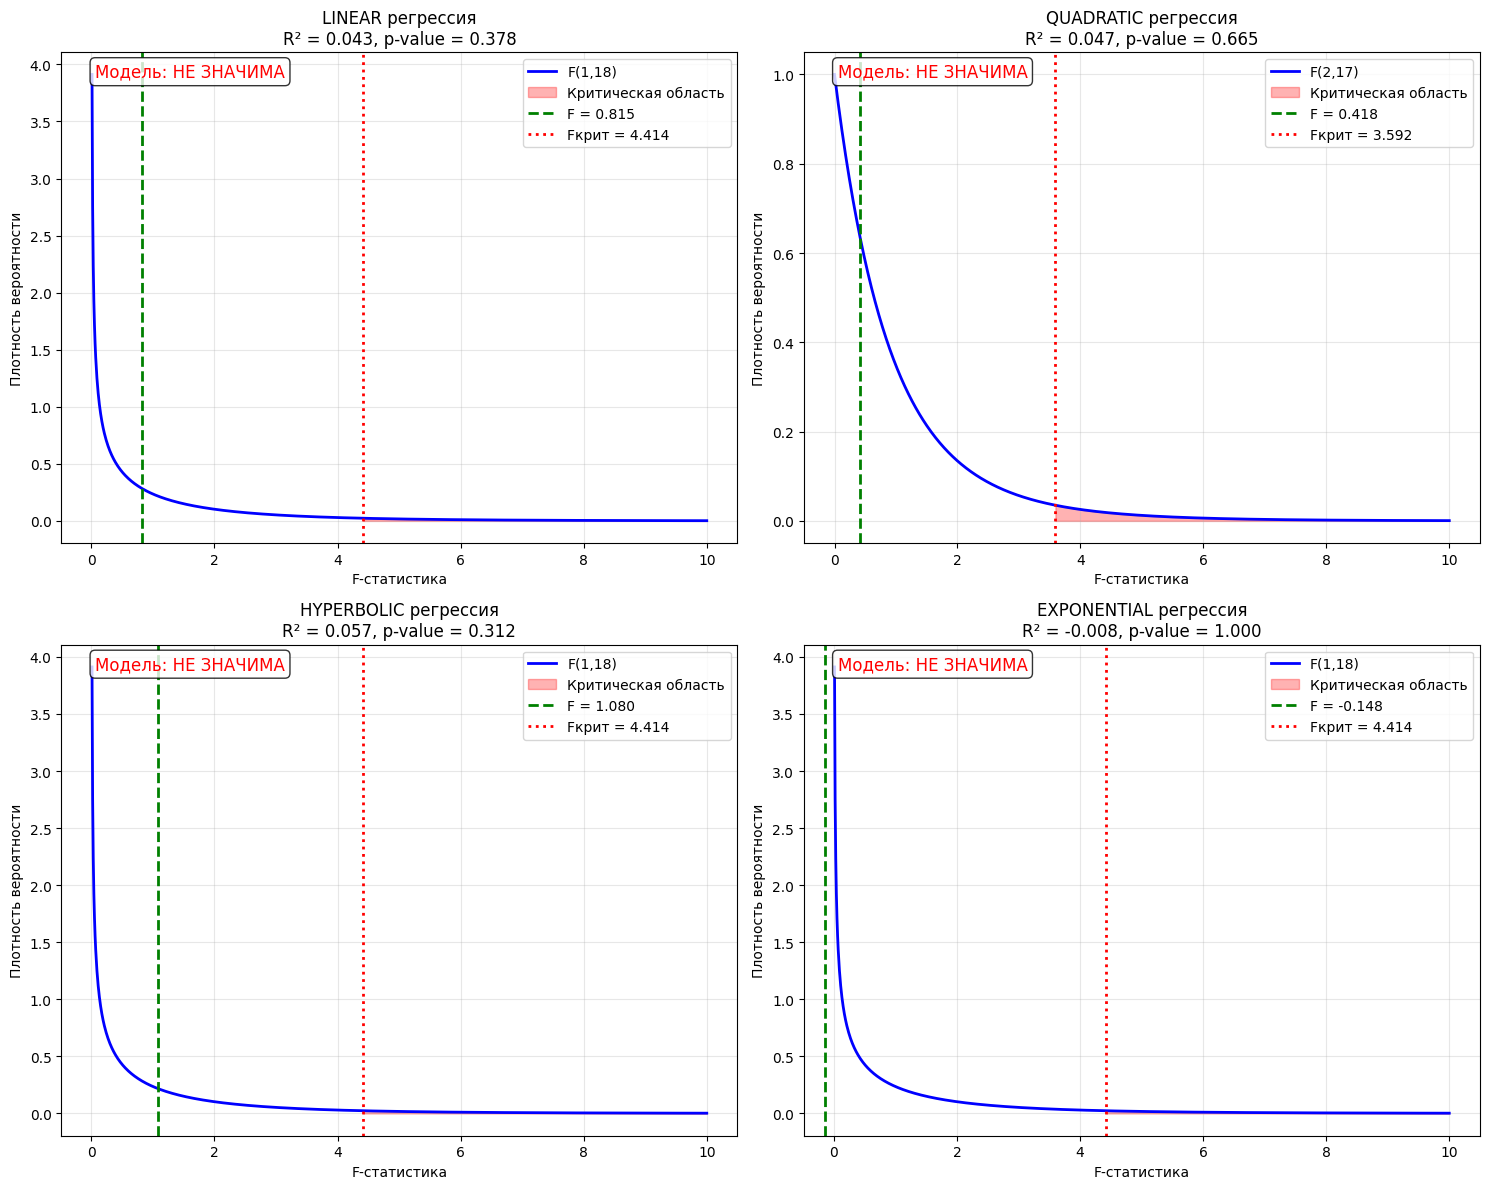


СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ ЗНАЧИМОСТИ
Модель          R²       F-стат     F-крит     p-value    Результат      
--------------------------------------------------------------------------------
linear          0.0433   0.8154     4.4139     0.378443   НЕ ЗНАЧИМА ✗   
quadratic       0.0469   0.4182     3.5915     0.664797   НЕ ЗНАЧИМА ✗   
hyperbolic      0.0566   1.0799     4.4139     0.312469   НЕ ЗНАЧИМА ✗   
exponential     -0.0083  -0.1482    4.4139     1.000000   НЕ ЗНАЧИМА ✗   


In [95]:
def regression_significance_test(x, y, y_pred, model_type, alpha=0.05):
    n = len(y)
    
    if model_type == 'linear':
        k = 2  # w0, w1
    elif model_type == 'quadratic':
        k = 3  # w0, w1, w2
    elif model_type in ['hyperbolic', 'exponential']:
        k = 2  # w0, w1
    else:
        raise ValueError("Неизвестный тип модели")
    
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    f_statistic = (r2 / (1 - r2)) * ((n - k) / (k - 1))
    
    df1 = k - 1  # степени свободы числителя
    df2 = n - k  # степени свободы знаменателя
    critical_value = stats.f.ppf(1 - alpha, df1, df2)

    p_value = 1 - stats.f.cdf(f_statistic, df1, df2)

    reject_h0 = f_statistic > critical_value
    
    return {
        'r2': r2,
        'f_statistic': f_statistic,
        'critical_value': critical_value,
        'p_value': p_value,
        'reject_h0': reject_h0,
        'n': n,
        'k': k,
        'df1': df1,
        'df2': df2
    }

def test_all_regressions(x, y):    
    results = {}

    w0_linear, w1_linear, r2_linear, y_pred_linear = analytical_linear_regression(x, y)
    results['linear'] = regression_significance_test(x, y, y_pred_linear, 'linear')

    w0_quad, w1_quad, w2_quad, r2_quad, y_pred_quad = analytical_quadratic_regression(x, y)
    results['quadratic'] = regression_significance_test(x, y, y_pred_quad, 'quadratic')

    w0_hyper, w1_hyper, r2_hyper, y_pred_hyper, x_hyper = analytical_hyperbolic_regression(x, y)
    if x_hyper is not None:
        mask = x != 0
        y_hyper_clean = y[mask]
        results['hyperbolic'] = regression_significance_test(x_hyper, y_hyper_clean, y_pred_hyper, 'hyperbolic')

    result_exp = analytical_exponential_regression(x, y)
    if result_exp[4] is None:
        w0_exp, w1_exp, r2_exp, y_pred_exp, _ = result_exp
        results['exponential'] = regression_significance_test(x, y, y_pred_exp, 'exponential')
    
    return results

x = df[col_1_name].values
y = df[col_2_name].values

significance_results = test_all_regressions(x, y)

print("ПРОВЕРКА ЗНАЧИМОСТИ УРАВНЕНИЙ РЕГРЕССИИ")
print("=" * 70)
print("H0: уравнение регрессии не значимо (все коэффициенты = 0)")
print("H1: уравнение регрессии значимо (хотя бы один коэффициент ≠ 0)")
print("=" * 70)

for model_name, result in significance_results.items():
    print(f"\n--- {model_name.upper()} РЕГРЕССИЯ ---")
    print(f"R² = {result['r2']:.6f}")
    print(f"F-статистика = {result['f_statistic']:.6f}")
    print(f"Критическое значение F({result['df1']},{result['df2']}) = {result['critical_value']:.6f}")
    print(f"P-value = {result['p_value']:.6f}")
    print(f"Статистически значима: {'ДА' if result['reject_h0'] else 'НЕТ'}")

    if result['reject_h0']:
        print("✓ ОТВЕРГАЕМ H0: уравнение регрессии статистически значимо")
    else:
        print("✗ НЕ ОТВЕРГАЕМ H0: уравнение регрессии не значимо")

def plot_f_distribution(results, alpha=0.05):
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    models = list(results.keys())
    
    for i, model_name in enumerate(models):
        if i >= 4: 
            break
            
        result = results[model_name]

        x_f = np.linspace(0, max(10, result['f_statistic'] * 1.5), 1000)
        y_f = stats.f.pdf(x_f, result['df1'], result['df2'])
        
        axes[i].plot(x_f, y_f, 'b-', linewidth=2, label=f'F({result["df1"]},{result["df2"]})')
        axes[i].fill_between(x_f, y_f, where=(x_f >= result['critical_value']), 
                           color='red', alpha=0.3, label='Критическая область')

        axes[i].axvline(result['f_statistic'], color='green', linestyle='--', 
                       linewidth=2, label=f'F = {result["f_statistic"]:.3f}')

        axes[i].axvline(result['critical_value'], color='red', linestyle=':', 
                       linewidth=2, label=f'Fкрит = {result["critical_value"]:.3f}')
        
        axes[i].set_title(f'{model_name.upper()} регрессия\n'
                         f'R² = {result["r2"]:.3f}, '
                         f'p-value = {result["p_value"]:.3f}')
        axes[i].set_xlabel('F-статистика')
        axes[i].set_ylabel('Плотность вероятности')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

        status = "ЗНАЧИМА" if result['reject_h0'] else "НЕ ЗНАЧИМА"
        color = "green" if result['reject_h0'] else "red"
        axes[i].text(0.05, 0.95, f'Модель: {status}', 
                    transform=axes[i].transAxes, fontsize=12, color=color,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

plot_f_distribution(significance_results)

def create_summary_table(results):
    
    print("\n" + "="*80)
    print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ ЗНАЧИМОСТИ")
    print("="*80)
    print(f"{'Модель':<15} {'R²':<8} {'F-стат':<10} {'F-крит':<10} {'p-value':<10} {'Результат':<15}")
    print("-"*80)
    
    for model_name, result in results.items():
        r2 = f"{result['r2']:.4f}"
        f_stat = f"{result['f_statistic']:.4f}"
        f_crit = f"{result['critical_value']:.4f}"
        p_val = f"{result['p_value']:.6f}"
        status = "ЗНАЧИМА ✓" if result['reject_h0'] else "НЕ ЗНАЧИМА ✗"
        
        print(f"{model_name:<15} {r2:<8} {f_stat:<10} {f_crit:<10} {p_val:<10} {status:<15}")
    
    print("="*80)

create_summary_table(significance_results)